In [ ]:
pip install hvplot

In [ ]:
# Imports
import hvplot.pandas
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


---

## Exploratory Data Analysis

In [ ]:
df_fraud_data = pd.read_csv(
    Path("C:/Users/ryans/Next/Downloads/fraudTest.csv"))

# Display sample data
df_fraud_data.head(10)

In [ ]:
# Import the `files` library to allow files upload
from google.colab import files

uploaded = files.upload()

In [ ]:
# Import applicants_data.csv to Google Colab
# Read the CSV file from the terminal
df = pd.read_csv("fraudTest.csv")

# Review the DataFrame
df.head()

In [6]:
# Review the data types associated with the columns
df = df_fraud_data
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
#viewing statistics about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.635331e+15,4.992346e+18
amt,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


In [8]:
#looking for null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
selected_col = ['trans_date_trans_time','amt','city','state','lat','long','job','merch_lat','merchant','is_fraud']

In [10]:
selected_col

['trans_date_trans_time',
 'amt',
 'city',
 'state',
 'lat',
 'long',
 'job',
 'merch_lat',
 'merchant',
 'is_fraud']

In [11]:
df_corr = df[selected_col].corr()

C:\Users\ryans\AppData\Local\Temp\ipykernel_17676\2451707784.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df[selected_col].corr()


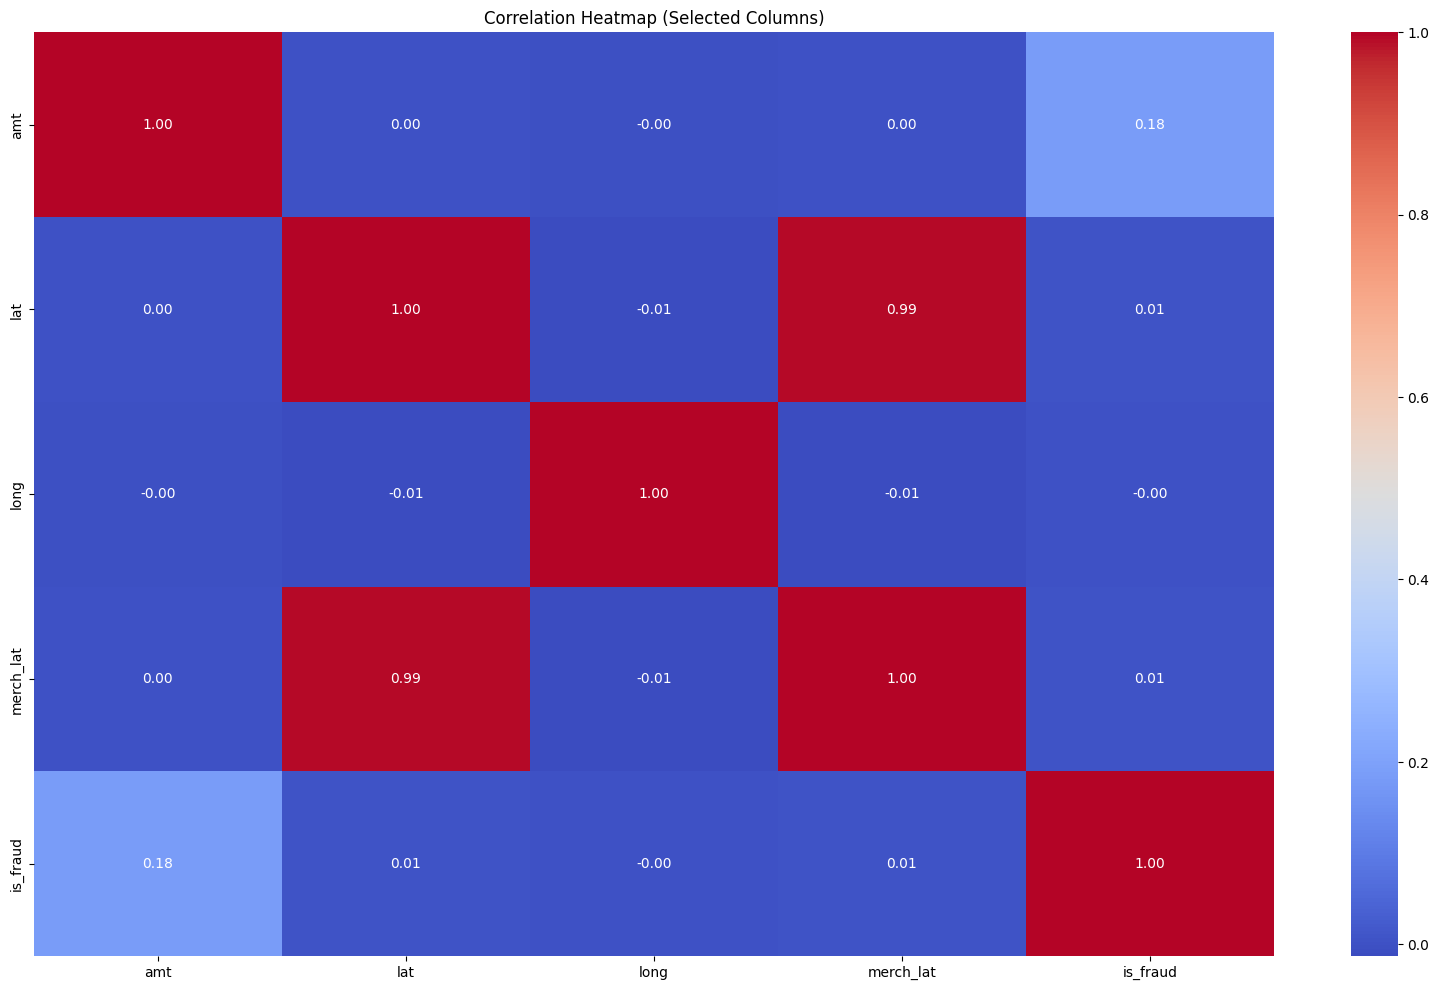

In [12]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Selected Columns)')
plt.show()


C:\Users\ryans\AppData\Local\Temp\ipykernel_17676\3569356307.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


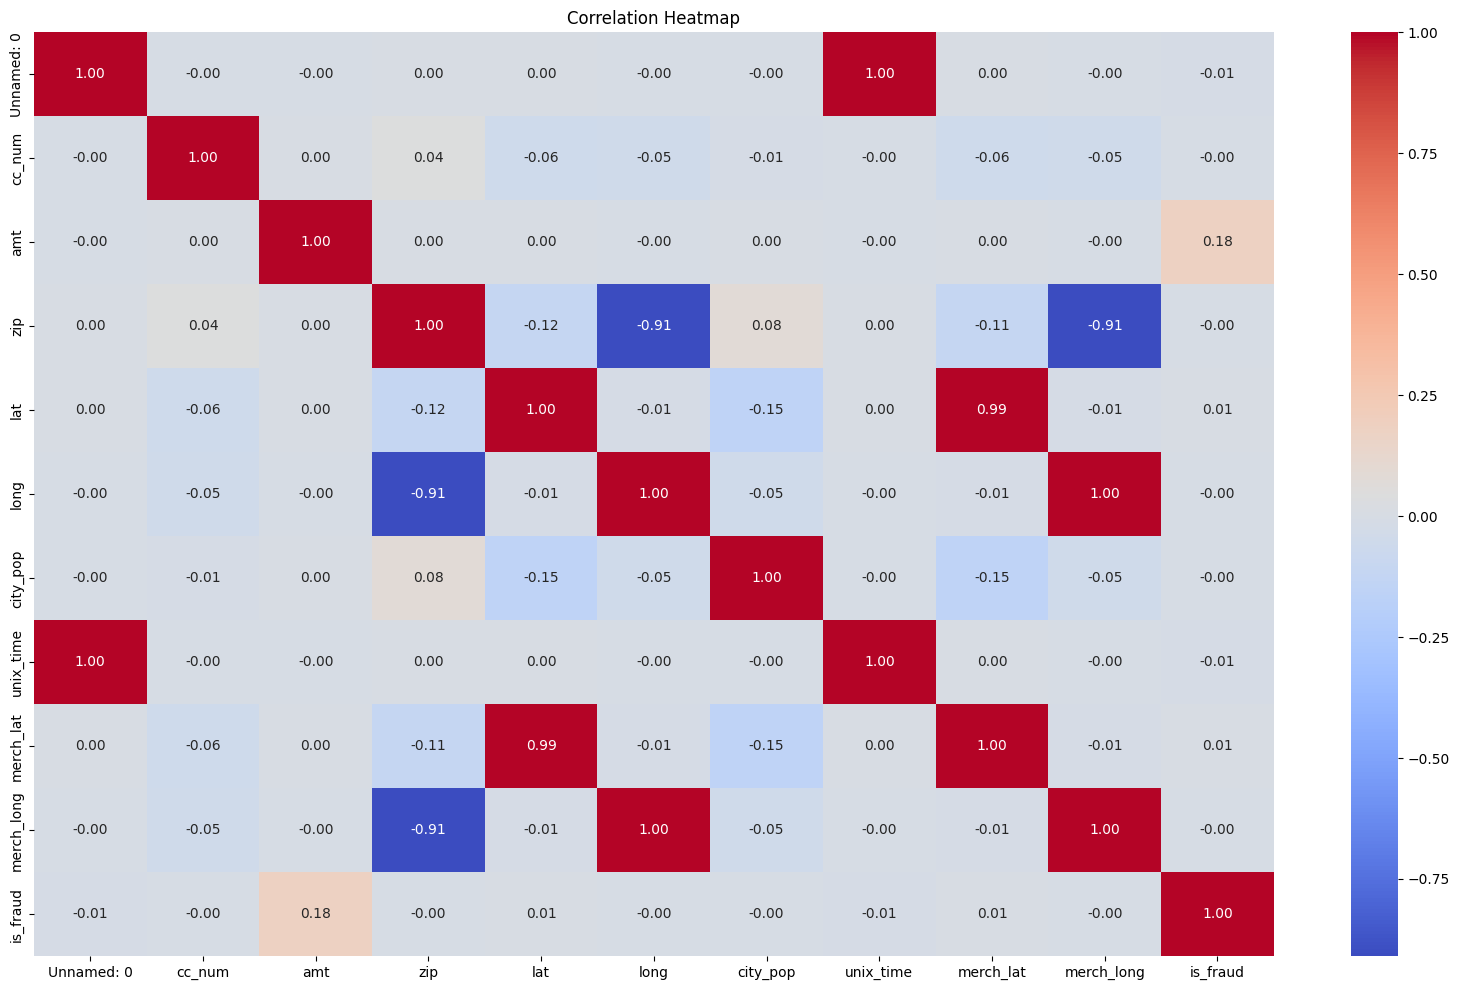

In [13]:
#analyzing related columns
df_corr = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Positive Correlations with our Class (The higher our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V2", data=df, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=df, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

plt.show()



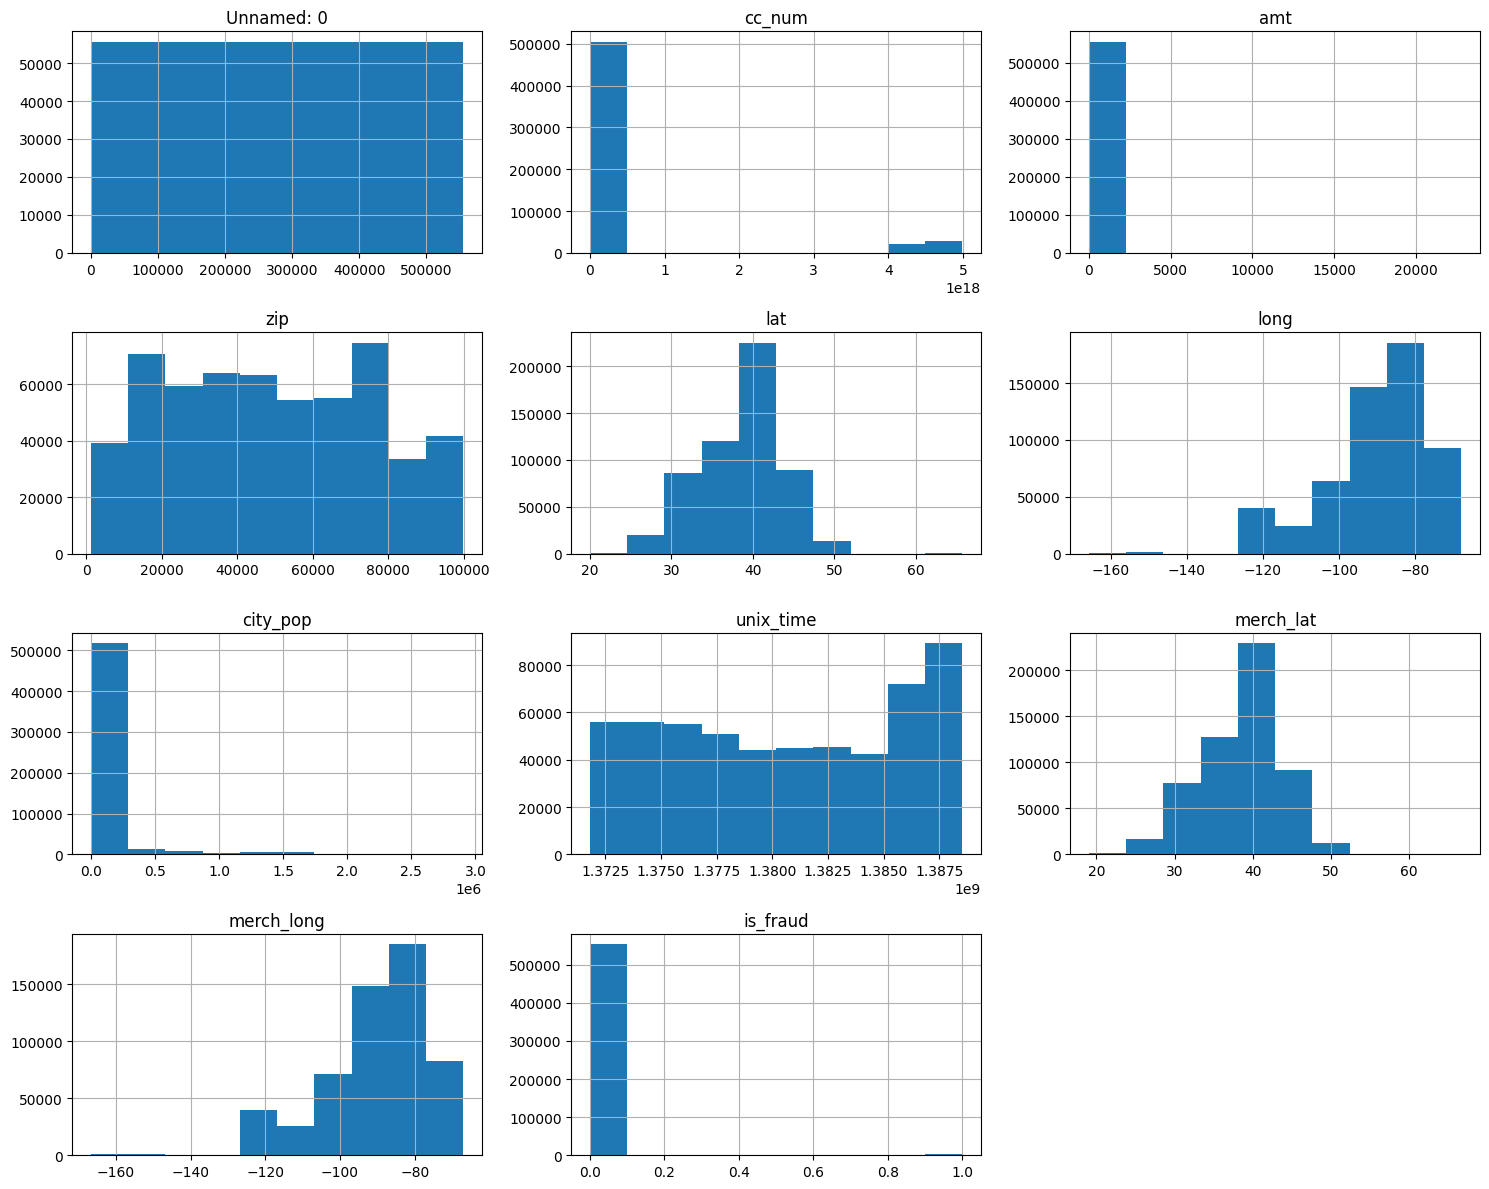

In [14]:
#plot histogram of dataframe
df.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

In [15]:
print('No Frauds', round(df['is_fraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['is_fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.61 % of the dataset
Frauds 0.39 % of the dataset


In [16]:
class_counts = df['is_fraud'].value_counts()

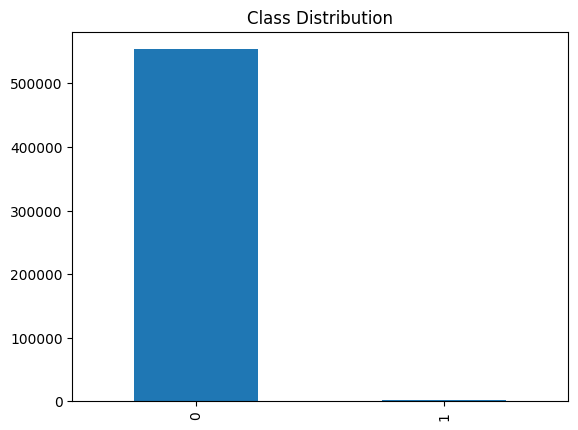

In [17]:
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.show()


In [18]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [19]:
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

In [20]:
df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [21]:
new_df = df[selected_col].set_index('trans_date_trans_time')
new_df

,amt,city,state,lat,long,job,merch_lat,merchant,is_fraud
trans_date_trans_time,,,,,,,,,
2020-06-21 12:14:25,2.86,Columbia,SC,33.9659,-80.9355,Mechanical engineer,33.986391,fraud_Kirlin and Sons,0
2020-06-21 12:14:33,29.84,Altonah,UT,40.3207,-110.4360,"Sales professional, IT",39.450498,fraud_Sporer-Keebler,0
2020-06-21 12:14:53,41.28,Bellmore,NY,40.6729,-73.5365,"Librarian, public",40.495810,"fraud_Swaniawski, Nitzsche and Welch",0
2020-06-21 12:15:15,60.05,Titusville,FL,28.5697,-80.8191,Set designer,28.812398,fraud_Haley Group,0
2020-06-21 12:15:17,3.19,Falmouth,MI,44.2529,-85.0170,Furniture designer,44.959148,fraud_Johnston-Casper,0
...,...,...,...,...,...,...,...,...,...
2020-12-31 23:59:07,43.77,Luray,MO,40.4931,-91.8912,Town planner,39.946837,fraud_Reilly and Sons,0
2020-12-31 23:59:09,111.84,Lake Jackson,TX,29.0393,-95.4401,Futures trader,29.661049,fraud_Hoppe-Parisian,0
2020-12-31 23:59:15,86.88,Burbank,WA,46.1966,-118.9017,Musician,46.658340,fraud_Rau-Robel,0


In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 555719 entries, 2020-06-21 12:14:25 to 2020-12-31 23:59:34
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   amt        555719 non-null  float64
 1   city       555719 non-null  object 
 2   state      555719 non-null  object 
 3   lat        555719 non-null  float64
 4   long       555719 non-null  float64
 5   job        555719 non-null  object 
 6   merch_lat  555719 non-null  float64
 7   merchant   555719 non-null  object 
 8   is_fraud   555719 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 42.4+ MB


In [25]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [26]:
list(new_df.dtypes[new_df.dtypes == "object"].index)

['city', 'state', 'job', 'merchant']

In [27]:
categorical_variables = ['city', 'state', 'job', 'merchant']

In [28]:
new_df.dtypes

amt          float64
city          object
state         object
lat          float64
long         float64
job           object
merch_lat    float64
merchant      object
is_fraud       int64
dtype: object

In [29]:
new_df.shape

(555719, 9)

In [30]:
# Use the fit_transform method from the OneHotEncoder to encode the data
encoded_data = enc.fit_transform(new_df[categorical_variables])

c:\Users\ryans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
)

# Display sample data
encoded_df.head()

,city_Achille,city_Acworth,city_Adams,city_Afton,city_Akron,city_Albany,city_Albuquerque,city_Alder,city_Aledo,city_Alexandria,...,"merchant_fraud_Yost, Schamberger and Windler",merchant_fraud_Yost-Rogahn,merchant_fraud_Zboncak LLC,merchant_fraud_Zboncak Ltd,"merchant_fraud_Zboncak, Rowe and Murazik",merchant_fraud_Zemlak Group,"merchant_fraud_Zemlak, Tillman and Cremin",merchant_fraud_Ziemann-Waters,"merchant_fraud_Zieme, Bode and Dooley",merchant_fraud_Zulauf LLC
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
encoded_df

(555719, 2070)

### Step 2: Data Preparation



In [32]:
# Define the target set y using the Class column
y = encoded_df["is_fraud"]

# Display a sample of y
y

KeyError: 'is_fraud'

In [ ]:
# Define features set X by selecting all columns but Class
X = encoded_df.drop(columns=['is_fraud'])

# Review the features DataFrame
X.head()

### Step 3: Split the features and target sets into training and testing datasets.


In [ ]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Step 5: Compile and Evaluate a Binary Classification Model Using a Neural Network

### Creating a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.


In [ ]:
# Define the the number of inputs (features) to the model
number_input_features = 30

# Review the number of features
number_input_features

In [ ]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 10

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

In [ ]:
#updating the tensorflow library graph
graph = tf.compat.v1.get_default_graph()

In [ ]:
# Create the Sequential model instance
nn = Sequential()

In [ ]:
# Adding the hidden layer with an activation function "relu"
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [ ]:
# Adding the output layer to the model specifying the number of output neurons and activation function for binary classification
nn.add(Dense(units=number_output_neurons, activation='sigmoid'))

In [ ]:
# Display the Sequential model summary
nn.summary()

###  Compile and fitting the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [ ]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fitting the model using 10 epochs and the training data
deep_learning_model = nn.fit(X_train_scaled, y_train, epochs=10, verbose=1)

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=1)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

---

## Optimize the neural network model


###  Defining two more deep neural network models (resulting in the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

### Alternative Model 1

In [ ]:
#setting callbacks function
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss`
        # is no longer improving
        monitor="loss",
        # "no longer improving" being defined
        # as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further
        # defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

In [ ]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

In [ ]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = 10

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

In [ ]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A1 = 10

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A1

In [ ]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [ ]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features, activation="relu"))

#Second Hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer2_A1, input_dim=number_input_features, activation="relu"))

# Output layer
nn_A1.add(Dense(units=number_output_neurons, activation='sigmoid'))

# Check the structure of the model
nn_A1.summary()

In [ ]:
# Compile the Sequential model
nn_A1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model using 10 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.2, callbacks = callbacks)

In [ ]:
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
#setting up variables and x and y axis for loss visual
history = fit_model_A1.history

# Extracting both training and validation loss values
training_loss = history['loss']
validation_loss = history['val_loss']

# the range of epochs
epochs = np.arange(0, len(training_loss) * 0.25, 0.25)

# Plotting the training and validation loss
plt.plot(epochs[:len(training_loss)], training_loss, 'g', label='Training loss')
plt.plot(epochs[:len(validation_loss)], validation_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.legend()
plt.show()



In [ ]:
#calculating predictive analysis
y_pred = nn.predict(X_test_scaled)
y_pred = np.where(y_pred > 0.5, 1, 0)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm

In [ ]:
#using confusion matrix to visualize True Negatives and True Positives
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

#### Alternative Model 2

In [ ]:
# Define the the number of inputs (features) to the model
number_input_features2 = len(X_train.iloc[0])

# Review the number of features
number_input_features2

In [ ]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = 10

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

In [ ]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A2 = 10

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A2

In [ ]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [ ]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features2, activation="tanh"))

#Second Hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer2_A2, activation="tanh"))

# Output layer
nn_A2.add(Dense(units=number_output_neurons_A2, activation='sigmoid'))


In [ ]:
nn_A2.summary()

In [ ]:
# Compile the model
nn_A2.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=5, batch_size=128, verbose=1, validation_split=0.2, callbacks = callbacks)

In [ ]:
#setting up variables and x and y axis for loss visual
history_A2 = fit_model_A2.history

# Extracting both training and validation loss values for 3rd model
training_loss_A2 = history_A2['loss']
validation_loss_A2 = history_A2['val_loss']

# the range of epochs
epochs_A2 = np.arange(0, len(training_loss_A2) * 0.25, 0.25)

# Plotting the training and validation loss
plt.plot(epochs_A2[:len(training_loss_A2)], training_loss_A2, 'g', label='Training loss')
plt.plot(epochs_A2[:len(validation_loss_A2)], validation_loss_A2, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.legend()
plt.show()

### Displaying the accuracy scores achieved by each model, and comparing the results.

In [ ]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=0)


# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled, y_test, verbose=0)


# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")